# Targeted OCR on documents

In [1]:
import cv2
import pytesseract
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
image_file = "data/Passport.png"
img = cv2.imread(image_file)
if img is None:
    print("Error: Image not loaded.")
else:
    print("Image dimensions:", img.shape)  # Print image dimensions (height, width)
#cv2.imshow('image',img)

Image dimensions: (642, 462, 3)


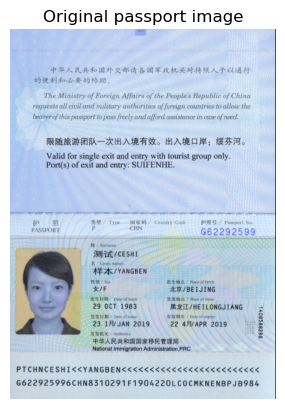

In [3]:
plt.imshow(img)
plt.axis('off')  # Turn off axes
plt.title('Original passport image')
plt.show()

In [4]:
img_copy = img.copy()
#Border detection
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
img_canny = cv2.Canny(img_gray, 50, 100, apertureSize = 3)

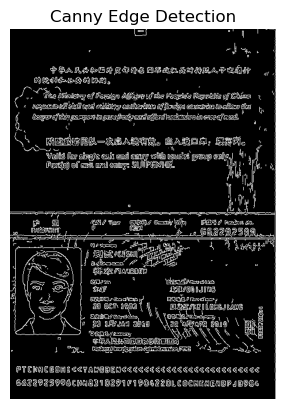

In [5]:
plt.imshow(img_canny, cmap='gray')
plt.axis('off')  # Turn off axes
plt.title('Canny Edge Detection')
plt.show()

In [6]:
#lines detection 
img_hough = cv2.HoughLinesP(img_canny, 1, math.pi / 180, 100, minLineLength = 100, maxLineGap = 10)

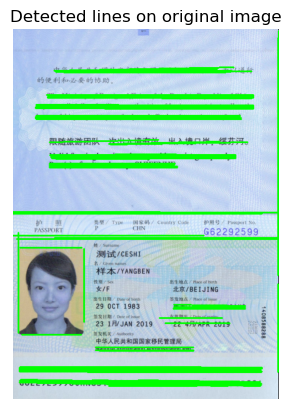

In [7]:
for line in img_hough:
    x1, y1, x2, y2 = line[0]
    #The color of the line is set to green (0, 255, 0) and the line thickness is set to 2 pixels
    cv2.line(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2) 
#Display lines on the original image  
plt.imshow(img_copy)
plt.axis('off')  # Turn off axes
plt.title('Detected lines on original image')
plt.show()

(642, 462)


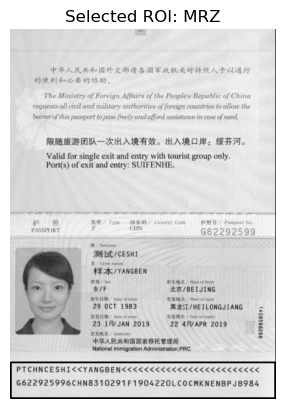

In [8]:
img_roi = img.copy()
img_gray = cv2.cvtColor(img_roi, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
(height, width) = img_gray.shape
print(img_gray.shape)
# dimensions of the region of interest (ROI): MRZ region
dim_mrz = (x, y, w, h) = (1, round(height*0.9), width-3, round(height*0.1)-2)
 #The color of the rectangle is (0, 0, 0) (black), and the thickness is set to 2 pixels.
img_roi = cv2.rectangle(img_gray, (x, y), (x + w ,y + h),(0,0,0),2)
#Displaying the selected area
plt.imshow(img_gray, cmap='gray')
plt.axis('off')  # Turn off axes
plt.title('Selected ROI: MRZ')
plt.show()

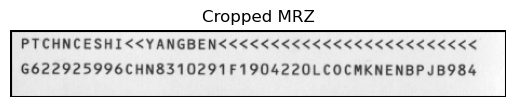

In [9]:
#Cropped region of interest: selecting MRZ region
img_mrz = img_gray[y:y+h, x:x+w]
plt.imshow(img_mrz, cmap='gray')
plt.axis('off')  # Turn off axes
plt.title('Cropped MRZ')
plt.show()

In [44]:
# Specify the whitelist characters you want to extract
mrz = pytesseract.image_to_string(img_mrz, config = '--psm 12')
print(mrz)

PT CHNCESHI<<Y ANGBENK<<<<<<<<<<K<KK<<KKKKKKKK

6622925996CHN8310291F1904220LCOCMKNENBP JB984



In [45]:
whitelist = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz<<'
mrz = pytesseract.image_to_string(img_mrz, config=f'--psm 6 -c tessedit_char_whitelist={whitelist}')
print(mrz)

PTCHNCESHI<<YANGBENK<<<<<<<<<<K<KK<<KKKKKKKK
6622925996CHN8310291F1904220LCOCMKNENBPJB984



In [57]:
#mrz = [line for line in mrz.split('\n') if len(line)>10]
if len(mrz)>10:
    lines= mrz.split('\n')
if mrz[0:2] == 'P<':
  lastname = lines[0].split('<')[0][3:]
else:
  lastname = lines[0].split('<')[0][5:]
firstname = [i for i in mrz.split('<') if (i).isspace() == 0 and len(i) > 0][1]
pp_no = lines[1][:9]

In [58]:
print("Lastname:", lastname)
print("Firstname:", firstname)
print("Passport Number:", pp_no)

Lastname: CESHI
Firstname: YANGBENK
Passport Number: 662292599
